<a href="https://www.kaggle.com/code/rohanambad/neural-network-regression-signal-strength-data?scriptVersionId=109010200" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fmt-project/FMT - Project.pdf
/kaggle/input/part-123-signalcsv/Part- 123 - Signal.csv


In [2]:

import pandas as pd 
import numpy as np  # to work on multidimensional arrray
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline  
import seaborn as sns # data visualization library more interactive graph

import warnings
warnings.filterwarnings("ignore")
import warnings 
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import torch 
import torch.nn as nn

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use(style='ggplot')
%matplotlib inline

In [3]:
data = pd.read_csv("../input/part-123-signalcsv/Part- 123 - Signal.csv")

In [4]:
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.tail(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
data.shape # to check rows and columns

(1599, 12)

In [7]:
data.columns # to check names of columns in data set

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

In [8]:
data.isnull().sum() # to check the null values in dataset

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [9]:
data.info() # to get general info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
data.describe() # to have statistical decription of data

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Looking the 11 parameters : Parameter 3 ranges between 0 and 1. 
Maximum value of Parameter 5 is 0.6 
Parameter 8 has a very low range between 0.9 and 1.004 
Standard deviation is lowest for Parameter 8, it is 0.001887 
'Signal_Strength' has classes as - 3.5, 4.0,5.0, 6.0, 7.0 and 7.5

<AxesSubplot:xlabel='Signal_Strength', ylabel='Density'>

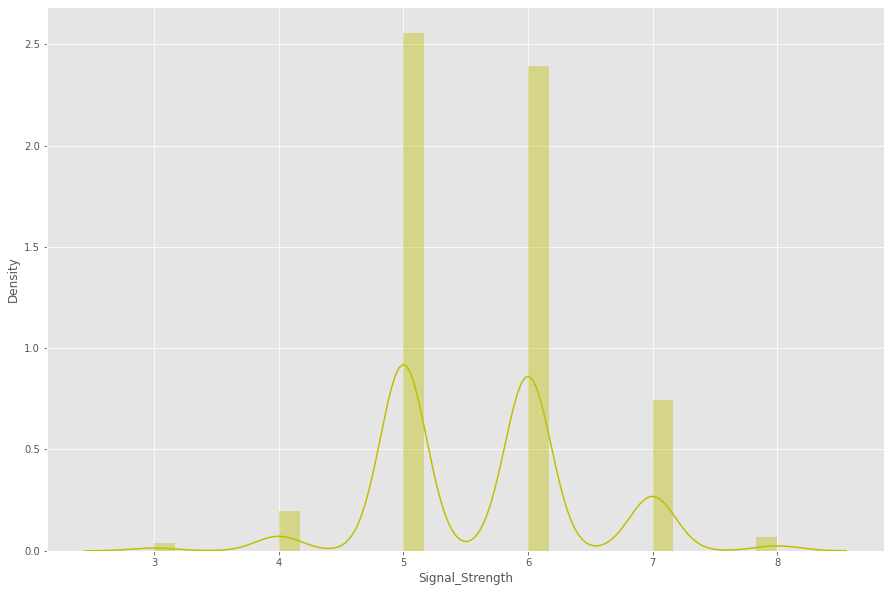

In [11]:
plt.figure(figsize=(15,10))
sns.distplot(data['Signal_Strength'],color="y")

In [12]:
numeric_features = data.describe().columns

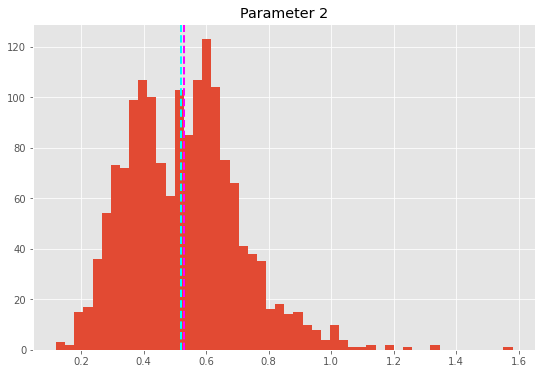

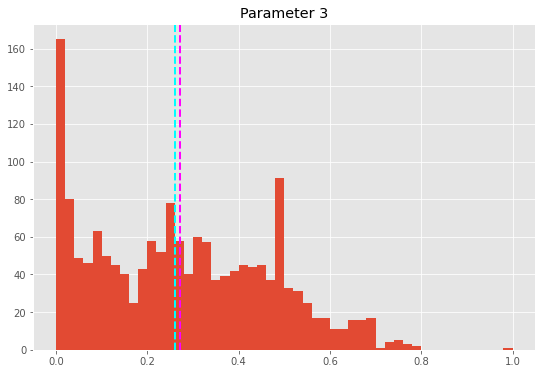

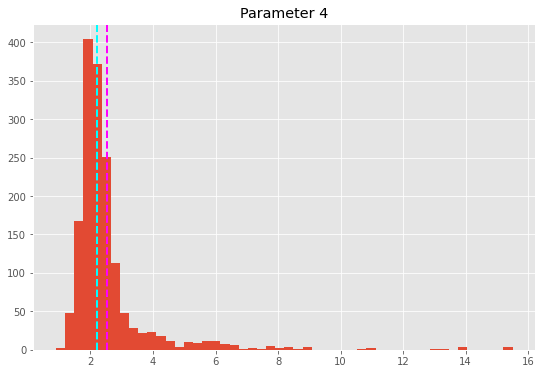

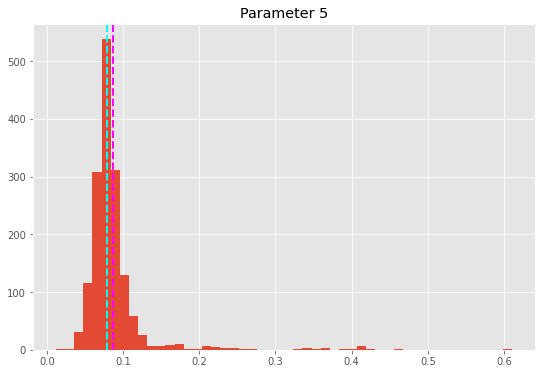

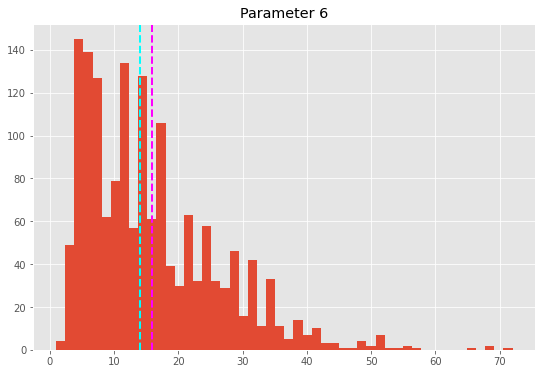

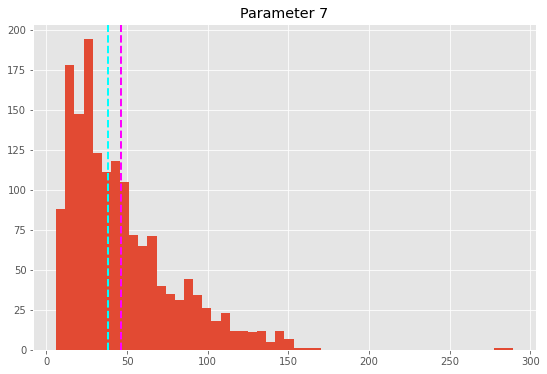

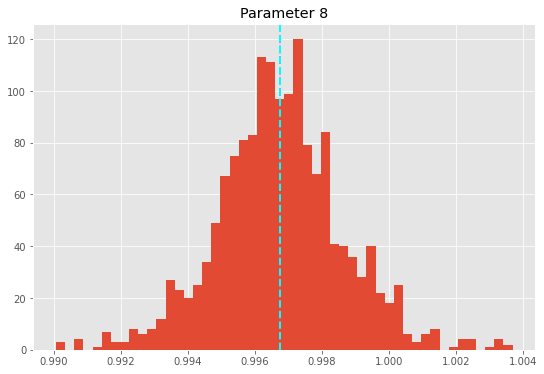

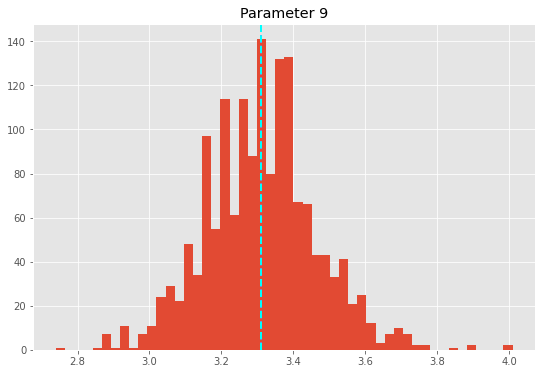

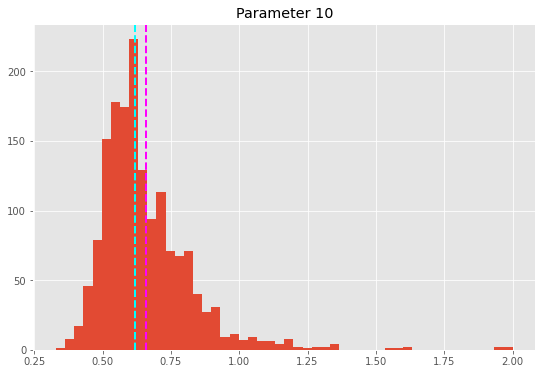

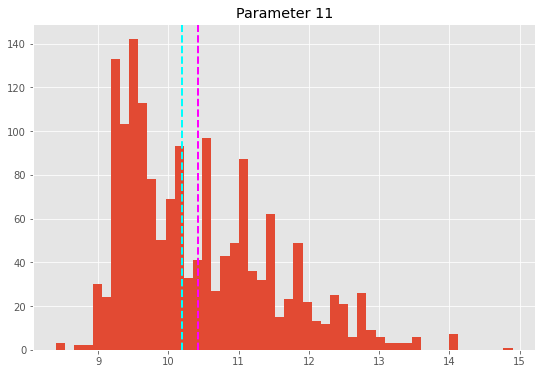

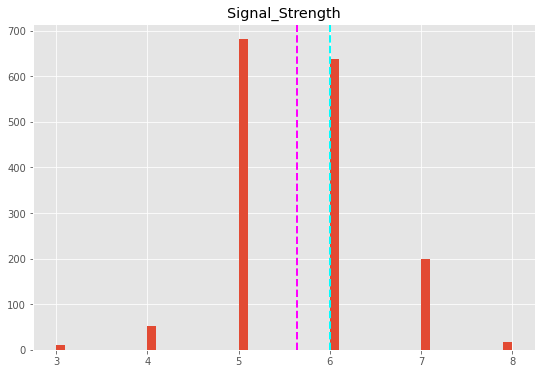

In [13]:
#@title Default title text
# plot a bar plot for each categorical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [14]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

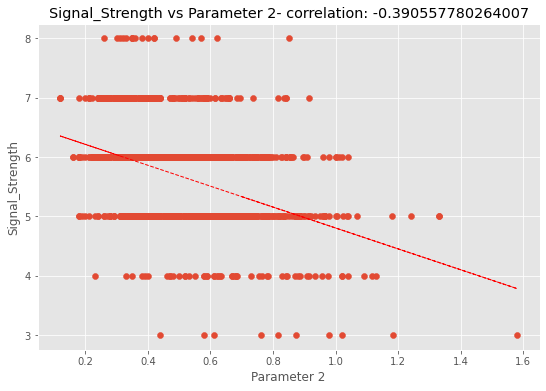

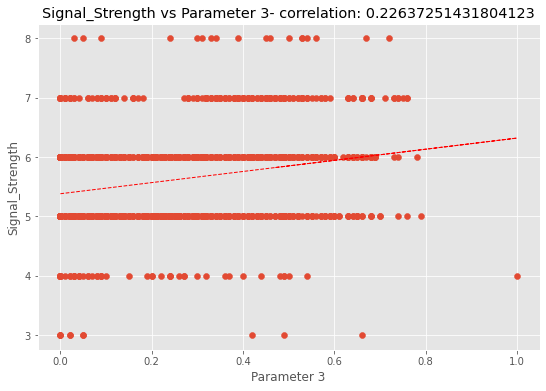

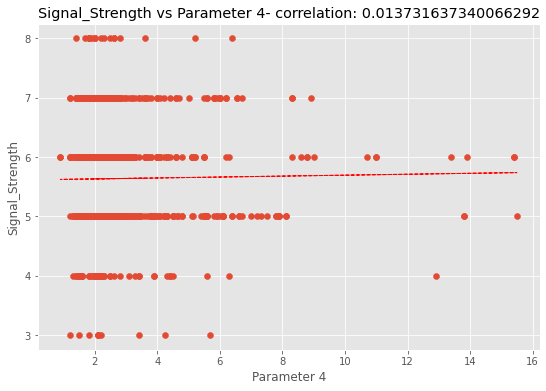

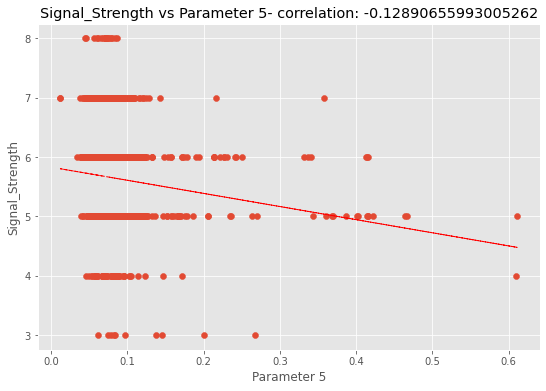

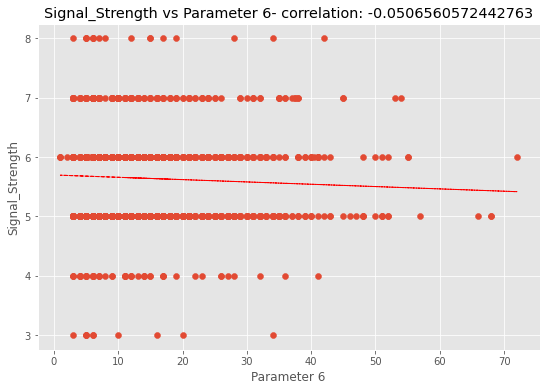

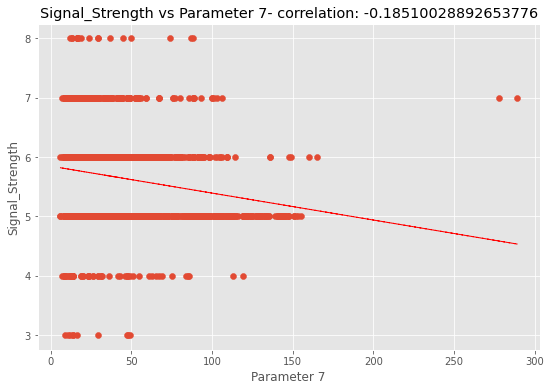

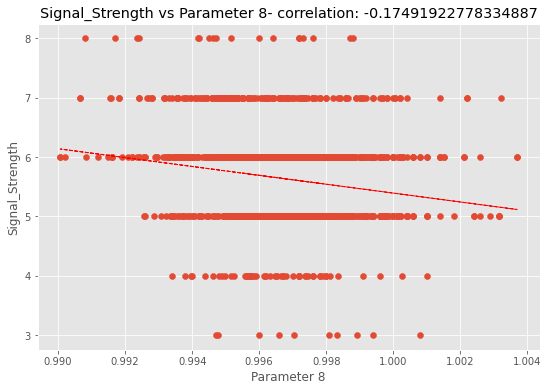

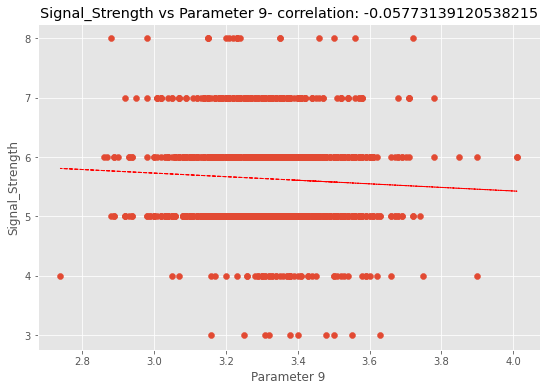

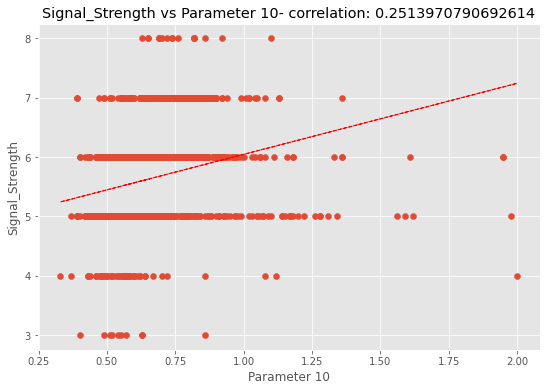

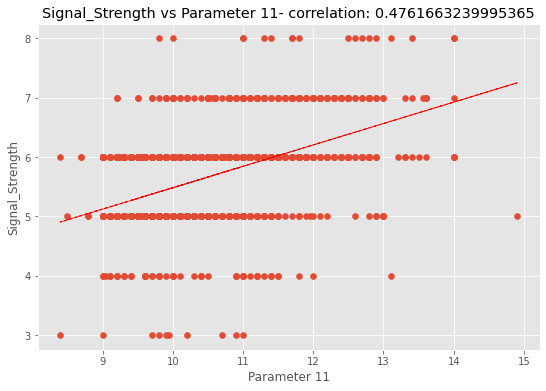

In [15]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['Signal_Strength']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Signal_Strength')
    ax.set_title('Signal_Strength vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Signal_Strength'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

In [16]:
data1=data

In [17]:
mydata=data1

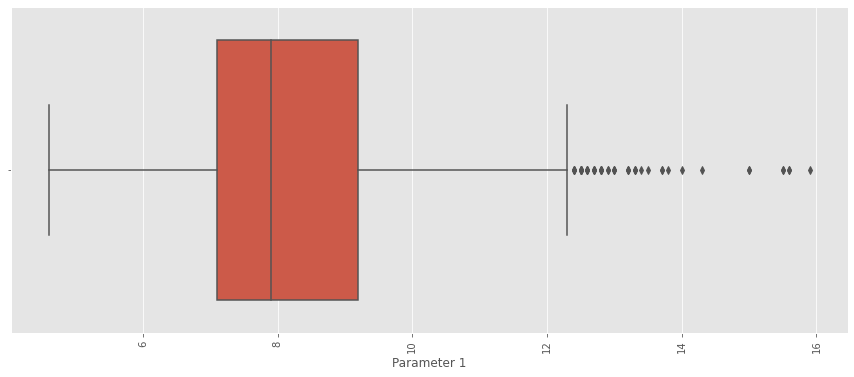

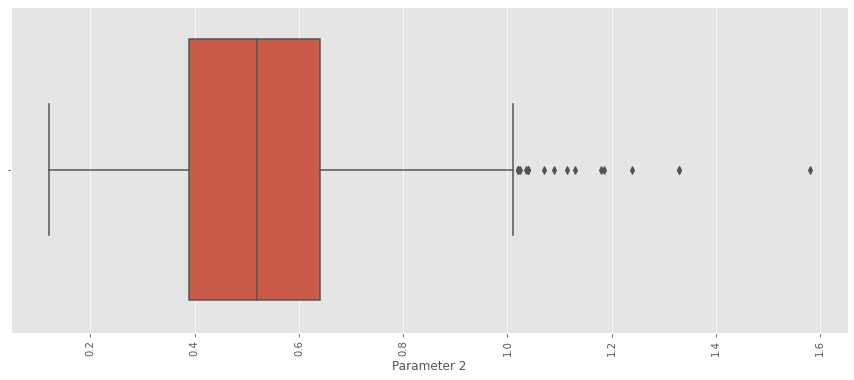

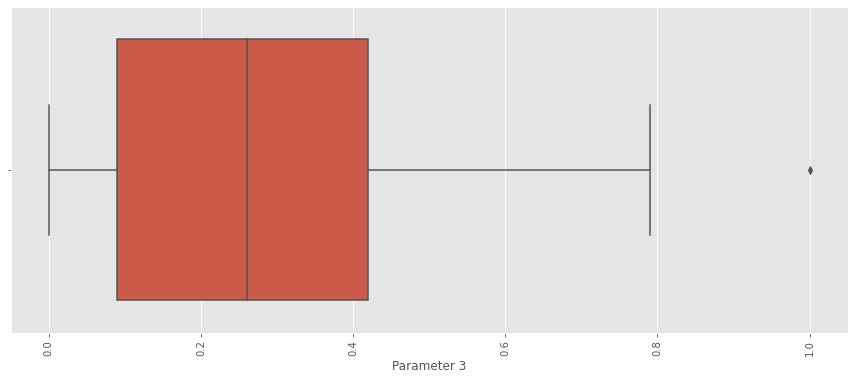

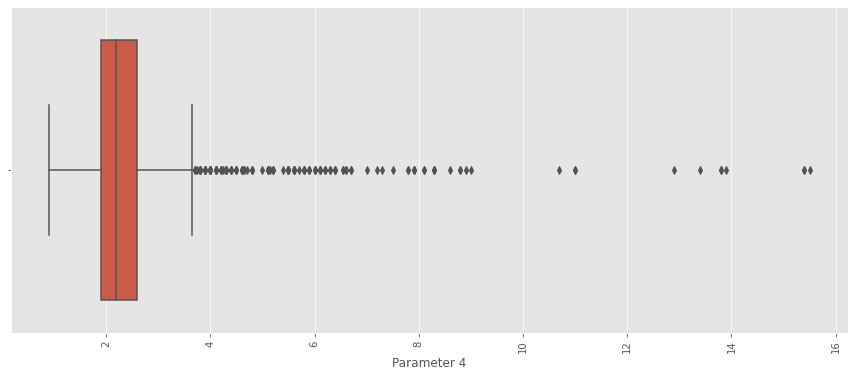

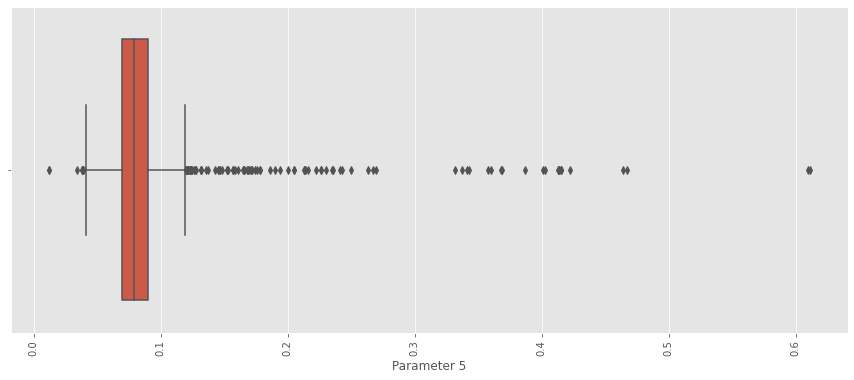

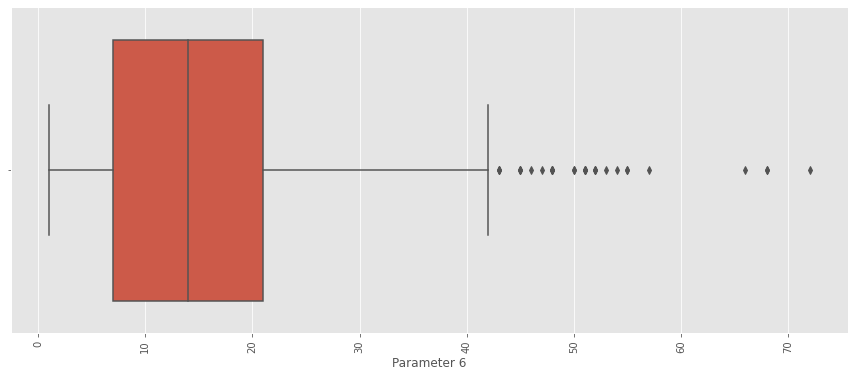

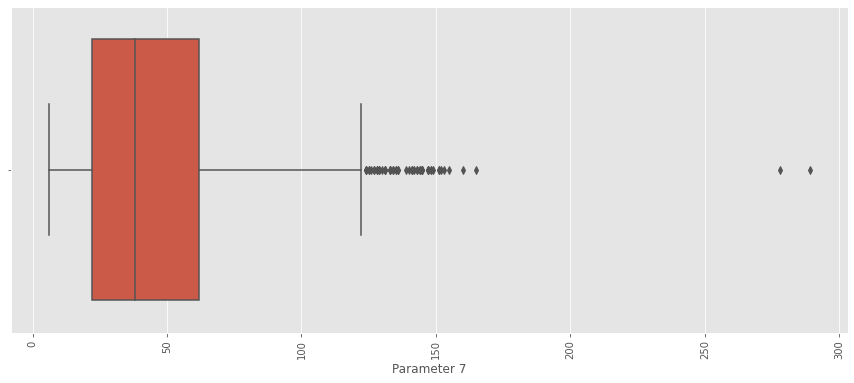

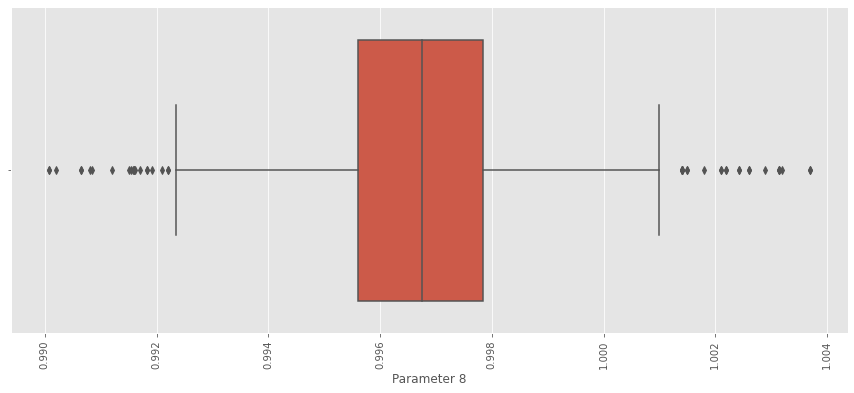

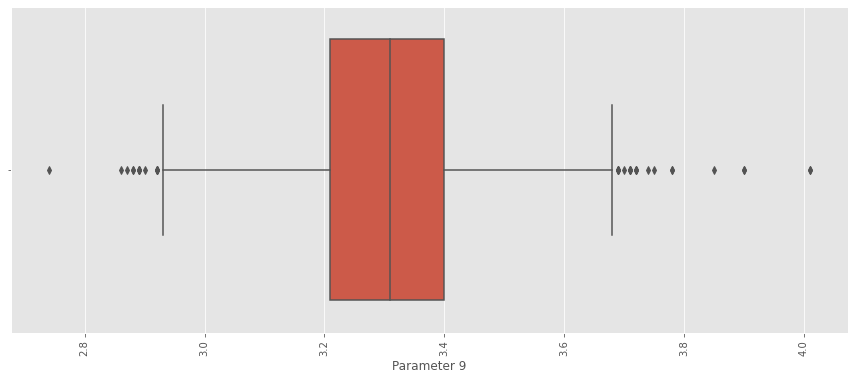

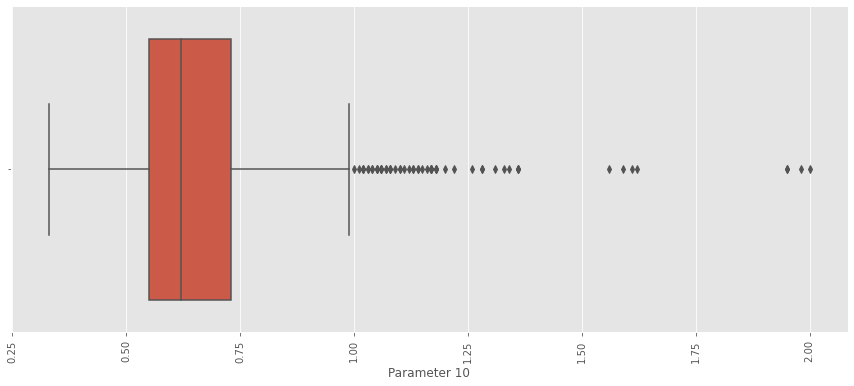

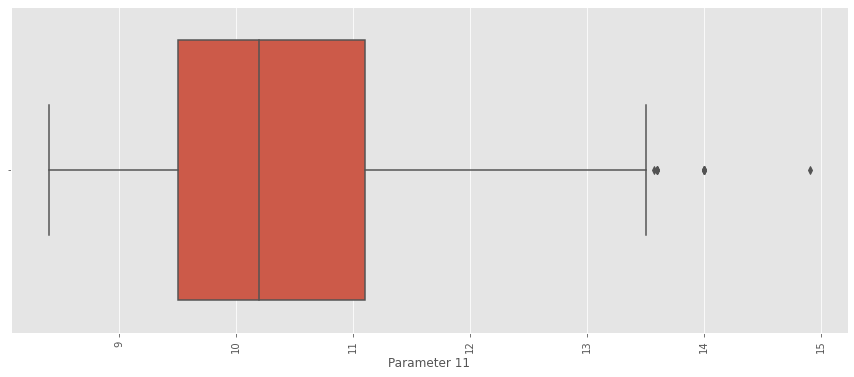

In [18]:
data1=mydata[['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11']]
for i in data1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data1[i])
    plt.xticks(rotation=90)
    plt.show()
  

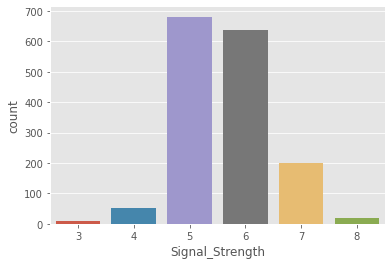

In [19]:
sns.countplot(mydata['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

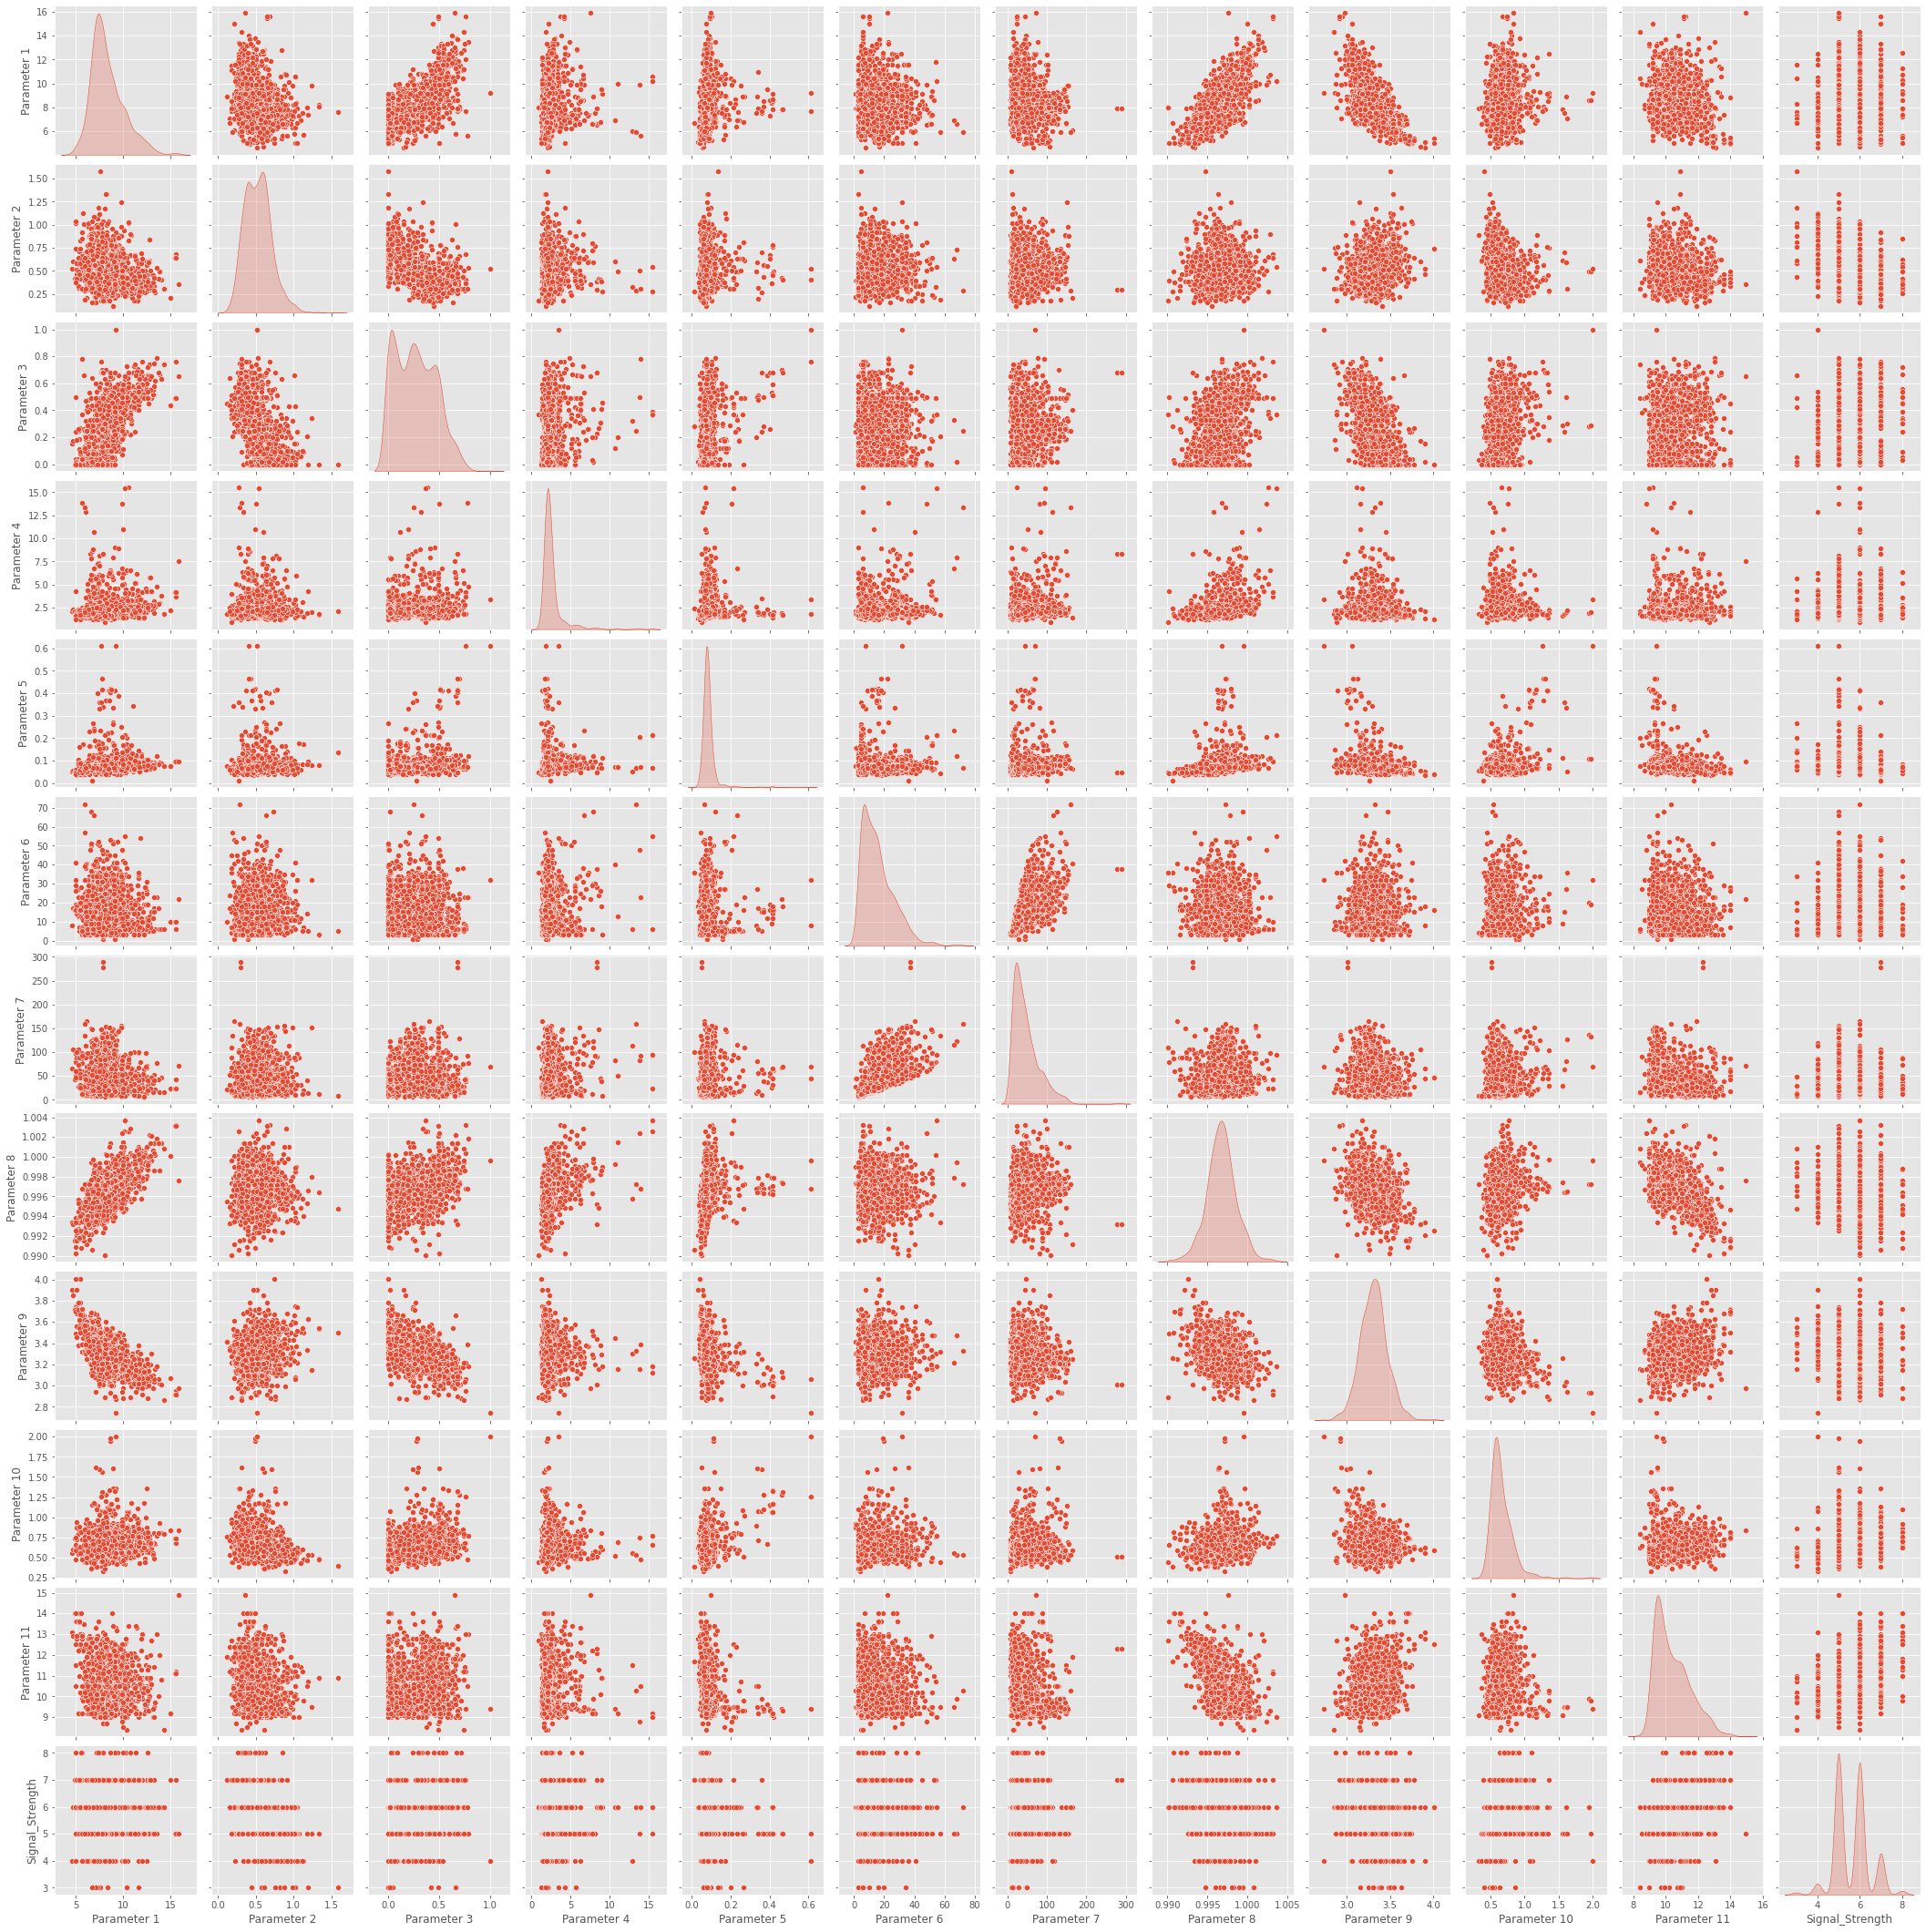

In [20]:
#plt.figure(figsize = (50,50))
sns.pairplot(mydata,diag_kind='kde')
plt.show()

1.Parameter 6 and Parameter 7 are highly correlated with each other and visce versa and they have almost 0 correlation with other Parameters 2.Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9. 3.Parameter 4 is has very low correlation with other Parameters.

Parameter 4 has the highest number of outliers which is 155.

In [21]:
strength_summary=pd.pivot_table(mydata,index=['Signal_Strength'],aggfunc='mean')

In [22]:
strength_summary

,Parameter 1,Parameter 10,Parameter 11,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9
Signal_Strength,,,,,,,,,,,
3,8.360000,0.570000,9.955000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000
4,7.779245,0.596415,10.265094,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509
5,8.167254,0.620969,9.899706,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949
6,8.347179,0.675329,10.629519,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072
7,8.872362,0.741256,11.465913,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754
8,8.566667,0.767778,12.094444,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222


In [23]:
#  function to treat outliers
''''def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
   #print('cols=',cols)
   # print('IQR_list=',IQR_list)
   # print('lower_boundary_list=',lower_boundary_list)
   # print('upper_boundary_list=',upper_boundary_list)
   # print('outliers_count=',outliers_count)
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    #print('Data=',ndf)
    #print('Columns having outliers=',cols)
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)'''

"'def detect_treate_outliers(df,operation):\n    cols=[]\n    IQR_list=[]\n    lower_boundary_list=[]\n    upper_boundary_list=[]\n    outliers_count=[]\n    for col in df.columns:\n        #print('col',col)\n        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):\n            #print('Inside if')\n            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)\n            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)\n            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)\n            up_cnt = df[df[col]>upper_boundary][col].shape[0]\n            #print('Upper count=',up_cnt)\n            lw_cnt = df[df[col]<lower_boundary][col].shape[0]\n            #print('lower count=',lw_cnt)\n            if(up_cnt+lw_cnt) > 0:\n                cols.append(col)\n                IQR_list.append(IQR)\n                lower_boundary_list.append(lower_boundary)\n                upper_boundary_list.append(upper_boundary)\n                outliers_count

In [24]:
''''#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.
count,df=detect_treate_outliers(mydata,'update')
if count>0:
    print('Updating dataset')
    mydata=df'''

"'#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.\ncount,df=detect_treate_outliers(mydata,'update')\nif count>0:\n    print('Updating dataset')\n    mydata=df"

<AxesSubplot:>

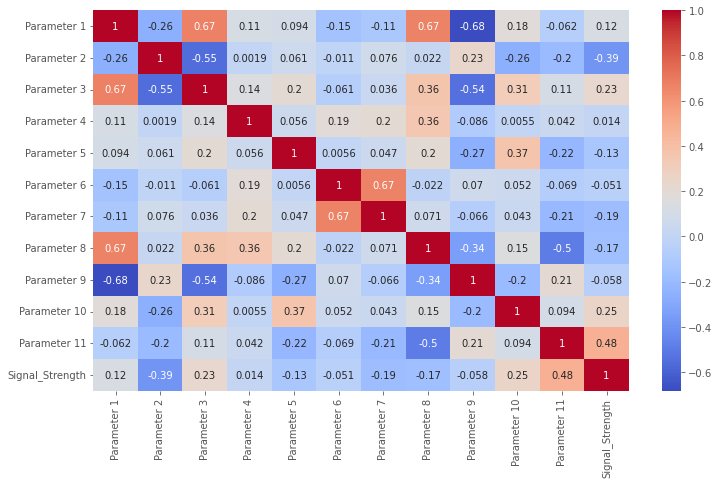

In [25]:
# studying correlation between the attributes
b_corr=mydata.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(b_corr,annot=True,cmap='coolwarm')

In [26]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [27]:
fig=px.bar(strength_summary,x=strength_summary.index,y=['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11'])
fig.update_layout(title_text="Comparision between parameters",
                  plot_bgcolor='white',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [28]:
X = mydata.drop('Signal_Strength',axis=1)
y = mydata['Signal_Strength']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train= scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)

In [35]:
X_train.shape

(1119, 11)

In [36]:
X_test.shape

(480, 11)

In [37]:
#Random forest Classifier model building
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(random_state=42)

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
accuracy_score(y_test, rf.predict(X_test))

0.6625

#  Hyperparameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [43]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.6s
[C

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [44]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8)

In [45]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [46]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.4589 degrees.
Accuracy = 91.68%.


# deep learning models

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [48]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

2022-10-24 17:06:16.800218: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [49]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

2022-10-24 17:06:17.065548: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
9/9 [==============================] - 1s 29ms/step - loss: 32.8381 - val_loss: 32.2922
Epoch 2/400
9/9 [==============================] - 0s 7ms/step - loss: 31.0713 - val_loss: 30.6045
Epoch 3/400
9/9 [==============================] - 0s 7ms/step - loss: 29.4173 - val_loss: 28.9348
Epoch 4/400
9/9 [==============================] - 0s 7ms/step - loss: 27.5871 - val_loss: 26.7293
Epoch 5/400
9/9 [==============================] - 0s 7ms/step - loss: 25.0048 - val_loss: 23.5002
Epoch 6/400
9/9 [==============================] - 0s 7ms/step - loss: 21.2037 - val_loss: 18.8297
Epoch 7/400
9/9 [==============================] - 0s 7ms/step - loss: 15.9220 - val_loss: 12.7694
Epoch 8/400
9/9 [==============================] - 0s 7ms/step - loss: 9.5600 - val_loss: 6.1237
Epoch 9/400
9/9 [==============================] - 0s 7ms/step - loss: 3.6902 - val_loss: 1.5155
Epoch 10/400
9/9 [==============================] - 0s 7ms/step - loss: 1.0357 - val_loss: 0.8885
Epoch 11/400
9

In [50]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

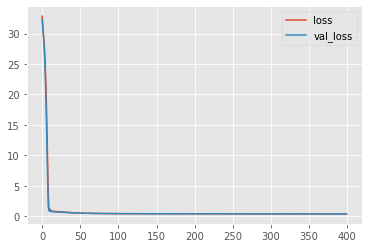

In [51]:
losses.plot()

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [53]:
predictions = model.predict(X_test)

In [54]:
mean_absolute_error(y_test,predictions)

0.49688514868418376

In [55]:
mean_squared_error(y_test,predictions)

0.38840705422656946

In [56]:
X = mydata.drop("Signal_Strength", axis=1)
y = mydata['Signal_Strength']

In [57]:
from sklearn.model_selection import train_test_split

# splitting to create test data
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [58]:
X_vtrain.shape

(1119, 11)

In [59]:
# splitting to create training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20, random_state=42)

In [60]:
X_train.shape

(895, 11)

In [61]:
# Initialize Sequential model
model_reg = tf.keras.models.Sequential()

# Normalize input data
model_reg.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg.add(tf.keras.layers.Dense(1))

In [62]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_reg.compile(optimizer='sgd', loss='mse')

In [63]:
model_reg.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=10)

Epoch 1/100
90/90 [==============================] - 1s 3ms/step - loss: 4.2711 - val_loss: 3.1542
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.9056 - val_loss: 0.9340
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6638 - val_loss: 0.6787
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5804 - val_loss: 0.5616
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5333 - val_loss: 0.5371
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4918 - val_loss: 0.5286
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4639 - val_loss: 0.5309
Epoch 8/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4779 - val_loss: 0.5320
Epoch 9/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4568 - val_loss: 0.5259
Epoch 10/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4664 - val_loss: 0.5156
Epoch 11/

In [64]:
y_pred = model.predict(X_test)

In [65]:
score_r = r2_score(y_test,y_pred)
print(score_r)

-13735.887416410715
